In [1]:
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import Draw
from rdkit.Chem import MACCSkeys

import numpy as np
import pandas as pd
import csv

In [2]:
with open('chembl_thrombin_ic50.csv', 'r') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=";")
    ligands = [Chem.MolFromSmiles(m['Smiles']) for m in reader]

supplier = Chem.SDMolSupplier('drugbank.sdf')
drugbank = [m for m in supplier if m]

In [3]:
print(len(ligands))
print(len(drugbank))

3236
7113


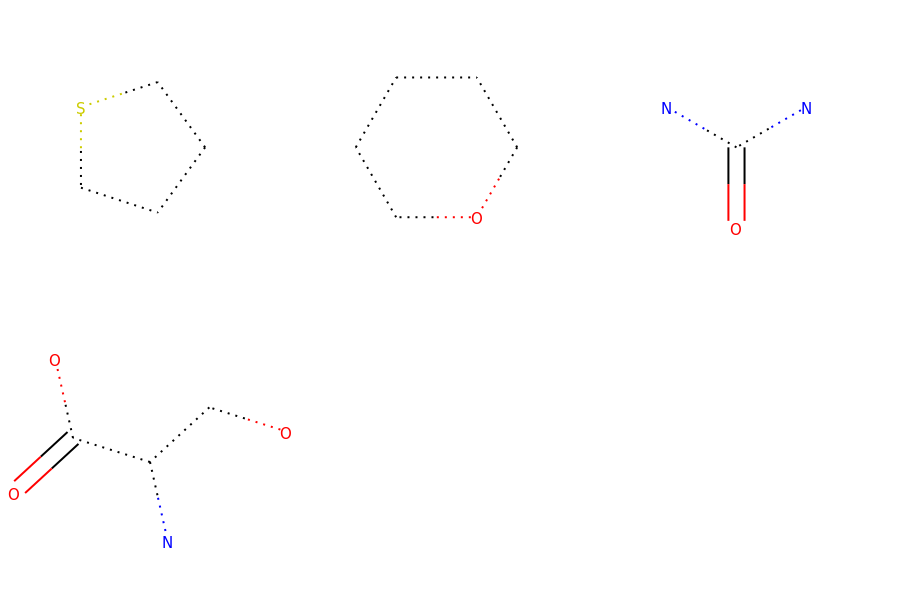

In [53]:
thiophene = Chem.MolFromSmarts("c1cscc1")
tetrahydropyran = Chem.MolFromSmarts("C1OCCCC1")
urea = Chem.MolFromSmarts("NC(=O)N")
serine = Chem.MolFromSmarts("OCC(N)C(=O)O")
does_interact = [thiophene, tetrahydropyran, urea, serine]
Draw.MolsToGridImage(does_interact, molsPerRow=3, subImgSize=(300,300))

Měl jsem trochu problém najít správné struktury, které by vyhovovaly. Nakonec jsem zvolil dehydrothiofen, dehydropyran, močovinový motiv a aminokyselinu serin, protože thrombin je serinová proteáza a tak bych čekal, že bude v jeho ligandech tento strukturní motiv častý.

In [54]:
ligand_keys = []
overview = [0, 0, 0, 0]
for l in ligands:
    key = []
    for i, t in enumerate(does_interact):
        if l.HasSubstructMatch(t):
            key.append(1)
            x = overview[i]
            overview[i] = x +1
        else:
            key.append(0)
    ligand_keys.append(key)
print(overview)
len(ligand_keys)

[200, 21, 86, 2]


3236

Malé zasoupení serinu mě trochu překvapilo, ale nevadí.

In [55]:
thrombin_keys = [MACCSkeys.GenMACCSKeys(l) for l in ligands]
db_keys = [MACCSkeys.GenMACCSKeys(d) for d in drugbank]
len(thrombin_keys), len(db_keys)

(3236, 7113)

In [56]:
np.set_printoptions(suppress=True)
thrombin_keys_sum = np.zeros(len(thrombin_keys[0]))
for l in thrombin_keys:
    for i,b in enumerate(l.ToBitString()):
        if int(b)==1:
            thrombin_keys_sum[i]+=1
thrombin_keys_sum

array([   0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,   27.,
          0.,    0.,   66.,    0.,    7.,    1.,    0.,    0.,   12.,
          9.,  101.,    1.,    7.,   32.,  143.,  117.,  959.,   14.,
          4.,   38.,   51.,    5.,    3.,  687.,  693.,   33.,  109.,
        671.,  133., 1367.,  147.,  147.,   33.,  462., 1857.,  118.,
         19.,   71.,  608.,  193.,  227.,  139.,  730.,  436.,  494.,
        865.,  856.,   92.,  591.,  856.,  594.,  856.,  856.,  814.,
         93.,  609., 1661.,  253.,  858.,   22.,  646.,  162.,  147.,
        567.,  871.,  465., 1997.,  151., 2370., 1909., 2132., 1273.,
       1156., 1618., 1913., 2163., 1897.,  881.,  838., 1418.,  657.,
       1894., 2037., 2729.,  913., 1136., 2275., 2000., 1457., 1453.,
        262., 2442., 1354., 1021.,  731., 2045., 1378., 1824.,  982.,
        584.,  714., 2769., 2444., 1240., 1209.,  602.,  597.,  677.,
       2842., 2223., 1978., 1994., 2481., 2259., 1268., 1333., 2611.,
       1064., 1769.,

In [57]:
db_keys_sum = np.zeros(len(db_keys[0]))
for l in db_keys:
    for i,b in enumerate(l.ToBitString()):
        if int(b)==1:
            db_keys_sum[i]+=1
db_keys_sum

array([   0.,    0.,    0.,   30.,    0.,    1.,   11.,   24.,   99.,
         46.,   22.,  117.,   30.,   60.,   33.,   11.,   52.,   77.,
         68.,  282.,    7.,   21.,  181.,  212.,  435.,  564.,  224.,
         96.,  149.,  726.,  126.,   21.,  431.,  481.,  153.,   44.,
        625.,  521., 1312.,  153.,  167.,  166.,  698., 1198.,  266.,
        246.,  194.,  455.,  869.,  713.,  646.,  601.,  553., 1895.,
       2246.,  663.,  178., 1633.,  669.,  604.,  685.,  695., 1753.,
        207.,  624., 2507., 1118.,  782.,  133., 1551.,  295.,  526.,
       2196.,  755., 1184., 2092.,  797., 2245.,  703., 2263., 2296.,
       1228., 2080., 2781., 2109., 2498., 1685., 1310., 1596., 2474.,
       3533., 3342., 2825., 1650., 1481., 3191., 3098., 2783., 3056.,
       1145., 2845., 2775., 1934.,  786., 3210., 2939., 2665., 1534.,
       1732., 2372., 3113., 3377., 2725., 2292., 1097., 1828., 1896.,
       3354., 3347.,  924., 3223., 3762., 2973., 2791., 2463., 3448.,
       2547., 3821.,

In [58]:
db_keys_proportions = np.divide(db_keys_sum,len(drugbank))
db_keys_proportions

array([0.        , 0.        , 0.        , 0.00421763, 0.        ,
       0.00014059, 0.00154646, 0.0033741 , 0.01391818, 0.00646703,
       0.00309293, 0.01644876, 0.00421763, 0.00843526, 0.00463939,
       0.00154646, 0.00731056, 0.01082525, 0.00955996, 0.03964572,
       0.00098411, 0.00295234, 0.02544637, 0.02980458, 0.06115563,
       0.07929144, 0.03149164, 0.01349642, 0.02094756, 0.10206664,
       0.01771404, 0.00295234, 0.06059328, 0.06762266, 0.02150991,
       0.00618586, 0.08786729, 0.07324617, 0.18445101, 0.02150991,
       0.02347814, 0.02333755, 0.09813018, 0.16842401, 0.03739632,
       0.03458456, 0.02727401, 0.06396738, 0.12217067, 0.100239  ,
       0.09081963, 0.08449318, 0.07774497, 0.26641361, 0.31575988,
       0.09320962, 0.0250246 , 0.22957964, 0.09405314, 0.08491494,
       0.09630254, 0.09770842, 0.24645016, 0.02910164, 0.0877267 ,
       0.35245325, 0.157177  , 0.10993955, 0.01869816, 0.21805146,
       0.04147336, 0.07394911, 0.30873049, 0.10614368, 0.16645

In [59]:
thrombin_keys_proportions = np.divide(thrombin_keys_sum, len(ligands))

In [61]:
diff_keys = np.subtract(thrombin_keys_proportions, db_keys_proportions)
diff_keys

array([ 0.        ,  0.        ,  0.        , -0.00421763,  0.        ,
       -0.00014059, -0.00154646, -0.0033741 , -0.00557454, -0.00646703,
       -0.00309293,  0.00394679, -0.00421763, -0.00627209, -0.00433037,
       -0.00154646, -0.00731056, -0.00711697, -0.00677875, -0.00843435,
       -0.00067509, -0.00078918, -0.01555761,  0.01438578, -0.02499988,
        0.21706208, -0.02716531, -0.01226032, -0.00920467, -0.08630644,
       -0.01616893, -0.00202527,  0.15170585,  0.14653061, -0.01131214,
        0.0274977 ,  0.11948747, -0.03214605,  0.2379841 ,  0.02391654,
        0.02194831, -0.01313978,  0.04463867,  0.4054326 , -0.00093155,
       -0.02871312, -0.00533334,  0.1239189 , -0.06252914, -0.03009067,
       -0.04786536,  0.14109396,  0.05698927, -0.11375601, -0.04845456,
        0.17131449,  0.00340556, -0.04694676,  0.17047096,  0.09864501,
        0.16822156,  0.16681568,  0.00509496, -0.00036246,  0.10046861,
        0.16083476, -0.07899406,  0.1552026 , -0.01189964, -0.01

In [62]:
diff_keys_sorted = dict(enumerate(diff_keys))
diff_keys_sorted

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: -0.004217629692113032,
 4: 0.0,
 5: -0.00014058765640376775,
 6: -0.0015464642204414453,
 7: -0.003374103753690426,
 8: -0.005574543867780177,
 9: -0.006467032194573317,
 10: -0.0030929284408828905,
 11: 0.003946794262563873,
 12: -0.004217629692113032,
 13: -0.006272094983731627,
 14: -0.004330369175539416,
 15: -0.0015464642204414453,
 16: -0.007310558132995923,
 17: -0.007116967713671081,
 18: -0.00677874926339193,
 19: -0.008434347041585619,
 20: -0.0006750901090414545,
 21: -0.0007891763839846851,
 22: -0.015557614263964535,
 23: 0.01438577530964475,
 24: -0.02499988269880337,
 25: 0.21706208465601295,
 26: -0.027165306233455096,
 27: -0.012260321071622025,
 28: -0.009204668344334447,
 29: -0.08630644077410449,
 30: -0.016168927277950138,
 31: -0.0020252703271243636,
 32: 0.1517058548242159,
 33: 0.14653061291873704,
 34: -0.011312136398874115,
 35: 0.027497703068790458,
 36: 0.11948747370932625,
 37: -0.03214604537696868,
 38: 0.23798409986624186,
 

In [63]:
diff_keys_sorted = {k: v for k,v in sorted(diff_keys_sorted.items(), key=lambda x:x[1])}
diff_keys_sorted

{139: -0.24355829617492097,
 89: -0.1447854317822292,
 72: -0.13351417702262455,
 53: -0.11375600690738957,
 109: -0.11283115213930447,
 157: -0.10500881322990674,
 29: -0.08630644077410449,
 99: -0.08000871330666513,
 66: -0.07899405795582766,
 115: -0.0725072148924904,
 76: -0.06538581580028002,
 108: -0.06302810519293267,
 48: -0.06252914065838468,
 116: -0.05734529666515306,
 54: -0.04845456107890683,
 50: -0.04786536151273014,
 57: -0.046946762808465214,
 37: -0.03214604537696868,
 49: -0.03009066774270963,
 126: -0.02927577198524195,
 45: -0.028713117245413394,
 71: -0.02852265485799864,
 26: -0.027165306233455096,
 24: -0.02499988269880337,
 74: -0.022759864292073384,
 152: -0.020684111005511152,
 69: -0.018422283265185663,
 30: -0.016168927277950138,
 22: -0.015557614263964535,
 41: -0.013139775932123097,
 27: -0.012260321071622025,
 68: -0.011899641614432879,
 34: -0.011312136398874115,
 28: -0.009204668344334447,
 19: -0.008434347041585619,
 16: -0.007310558132995923,
 17: -0

Fragmenty hojnější v thrombinových ligandech proti DB:

78: C=N

119: N=A

92: OC(N)C

110: NCO

77: NAN

Fragmenty hojnější v DB oproti thrombinovým ligandům:

139: OH

89: OAAAO

72: OAAO

53: QHAAAQH

109: ACH2O

Obecně to na mě působí tak, že DB obsahuje hydrofilnější molekuly. To jde proti mému tvrzení z předešlách cvičení, kdy jsem říkal, že v DB očekávám spíše malé lipofilnější molekuly, zatímco v thrombinovém setu větší (peptidovité) hydrofilnější.